In [223]:
import pandas as pd
from sklearn import set_config
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [253]:
# Display estimators as diagrams in Jupyter notebook
set_config(display='diagram')

In [254]:
# Define paths to datasets and target/feature information
train = 'train.csv'
test = 'test.csv'
index = 'PassengerId'
target = 'Survived'
features = ['Sex']

In [282]:
# Read data and isolate target
X = pd.read_csv(train, index_col=index)
y = X.pop(target)

# Split data from training and testing
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, random_state=0, train_size=0.8, test_size=0.2)

In [290]:
X_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
141,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C
440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
818,2,"Mallet, Mr. Albert",male,31.0,1,1,S.C./PARIS 2079,37.0042,NaN,C
379,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C
492,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.2500,NaN,S


### Define preprocessor
 - Create a transformer for each column(s) as required.
 - Here we just perform ordinal encoding on the 'Sex' feature.
   - Categories are explicity provide so we know that female = 0, male = 1.
 - Any features not defined in the ColumnTransformer are dropped by default.

In [284]:
transformers = [
    ('Sex', OrdinalEncoder(categories=[['female', 'male']]), features)]
preProcessor = ColumnTransformer(transformers=transformers, remainder='drop')

### Check out processed data
  - View processed data as a sanity check, is everything as expected?

In [285]:
processedData = pd.DataFrame(
    preProcessor.fit_transform(X_train, y_train), 
    columns=features)
processedData.head()

,Sex
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0


### Build pipeline and train model

In [286]:
# Combine processor and modelling steps into a Pipeline object
model = Pipeline(steps=[
    ('preProcess', preProcessor),
    ('estimator',  DecisionTreeClassifier()),
])

In [287]:
# Train model
model.fit(X_train, y_train)

Pipeline(steps=[('preProcess',
                 ColumnTransformer(transformers=[('Sex',
                                                  OrdinalEncoder(categories=[['female',
                                                                              'male']]),
                                                  ['Sex'])])),
                ('estimator', DecisionTreeClassifier())])

In [288]:
# Check score against unseen data
model.score(X_valid, y_valid)

0.7877094972067039

### Visualise decision tree
  - Model predicts all females survive and all men die.

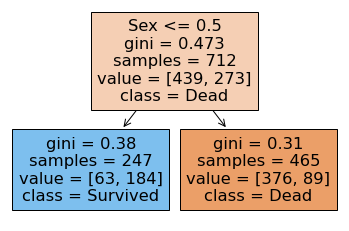

In [289]:
tree = model.named_steps['estimator'] # Extract estimator from Pipeline object
fig, ax = plt.subplots()
_ = plot_tree(tree, feature_names=features, class_names=['Dead', 'Survived'], filled=True, ax=ax)
# fig.savefig('tree.png')